**Plan**

**1. Introduction**<br>
**2. Collaborative filtering**<br>
**3. Content-based filtering**<br>
**4. Hybrid recommendation systems**<br>
**5. Evaluating recommendation systems**


# **Introduction**

**Definition**

Recommendation Systems: Software tools and techniques providing suggestions for items to be of use to a user. These systems are employed to predict the "rating" or "preference" a user would give to an item.

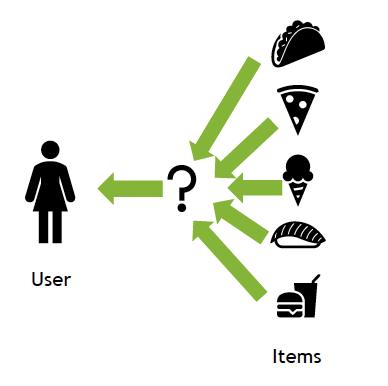

# **Collaborative filtering**

**Concept**:
- **User-Based Collaborative Filtering**: Recommends items by finding users similar to the target user and suggesting items that those similar users have liked.
- **Item-Based Collaborative Filtering**: Recommends items by looking at the similarity between items and suggesting items similar to those the user has liked.

**Techniques**:
- **Memory-Based**: Uses user-item interaction data to compute similarity and make recommendations. E.g., k-Nearest Neighbors (k-NN).
- **Model-Based**: Uses machine learning models to predict user-item interactions. E.g., Matrix Factorization (like Singular Value Decomposition), Deep Learning models.

**Pros and Cons**:
- **Pros**: Simple to implement, doesn't require detailed item features.
- **Cons**: Cold start problem, sparsity issues, scalability issues.

---



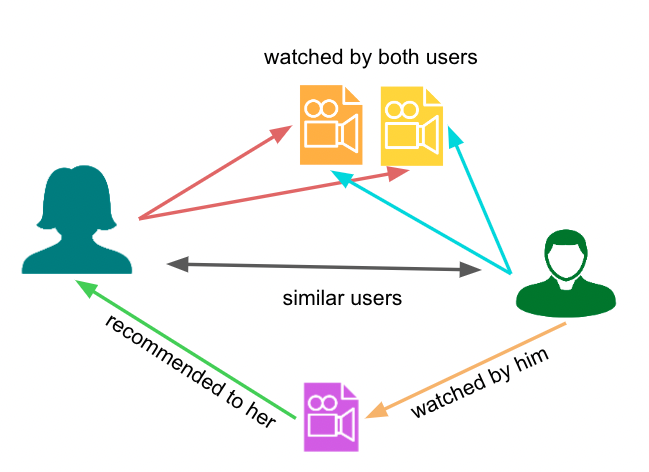

**Memory-Based Collaborative Filtering**

**1. User-Based Collaborative Filtering:**

- **Similarity Computation**:
  To recommend items, we first need to find users similar to the target user. One common similarity measure is cosine similarity.
  
  For users $ u $ and $ v $, with ratings vectors $ \mathbf{r}_u $ and $ \mathbf{r}_v $, cosine similarity is given by:
  $$
  \text{sim}(u, v) = \frac{\mathbf{r}_u \cdot \mathbf{r}_v}{\|\mathbf{r}_u\| \|\mathbf{r}_v\|}
  $$
  where $ \mathbf{r}_u \cdot \mathbf{r}_v $ is the dot product of the vectors, and $ \|\mathbf{r}_u\| $ and $ \|\mathbf{r}_v\| $ are their magnitudes.

- **Prediction**:
  Once similarities are computed, the rating $ r_{ui} $ of user $ u$  for item $ i $ can be predicted by weighted average of ratings from similar users $ S(u) $:
  $$
  r_{ui} = \frac{\sum_{v \in S(u)} \text{sim}(u, v) \cdot r_{vi}}{\sum_{v \in S(u)} |\text{sim}(u, v)|}
  $$

**2. Item-Based Collaborative Filtering:**

- **Similarity Computation**:
  Similarity between items $ i $ and $ j $ can also be calculated using cosine similarity:
  $$
  \text{sim}(i, j) = \frac{\mathbf{r}_i \cdot \mathbf{r}_j}{\|\mathbf{r}_i\| \|\mathbf{r}_j\|}
  $$

- **Prediction**:
  The rating $ r_{ui} $ of user $ u $ for item $ i $ can be predicted using ratings of user $ u $ for similar items $ S(i) $:
  $$
  r_{ui} = \frac{\sum_{j \in S(i)} \text{sim}(i, j) \cdot r_{uj}}{\sum_{j \in S(i)} |\text{sim}(i, j)|}
  $$

**Model-Based Collaborative Filtering**

**1. Matrix Factorization (e.g., Singular Value Decomposition - SVD)**:

- **Basic Concept**:
  Matrix factorization techniques aim to decompose the user-item interaction matrix $ R $ into the product of two lower-dimensional matrices:
  $$
  R \approx P Q^T
  $$
  where $ P \in \mathbb{R}^{m \times k} $ (user-feature matrix) and $ Q \in \mathbb{R}^{n \times k} $ (item-feature matrix), $ m $ is the number of users, $ n $ is the number of items, and $ k $ is the number of latent features.

- **Optimization**:
  The objective is to minimize the difference between the actual and predicted ratings:
  $$
  \min_{P, Q} \sum_{(u, i) \in \mathcal{K}} (r_{ui} - P_u \cdot Q_i^T)^2 + \lambda (\|P_u\|^2 + \|Q_i\|^2)
  $$
  where $ \mathcal{K} $ is the set of known ratings and $ \lambda $ is a regularization parameter to avoid overfitting.

**2. Deep Learning Models**:

- **Neural Collaborative Filtering (NCF)**:
  Uses neural networks to model user-item interactions.
  - **Architecture**:
    $$
    \hat{r}_{ui} = \text{NN}(\mathbf{p}_u, \mathbf{q}_i)
    $$
    where $\mathbf{p}_u$ and $\mathbf{q}_i$ are latent feature vectors for user $ u $ and item $ i $, respectively, and $\text{NN}$ denotes a neural network.

- **Autoencoders**:
  Used for learning compact representations of users/items.
  - **Architecture**:$$\mathbf{h} = f_{\text{encoder}}(\mathbf{r}_u)$$$$\mathbf{r}_u' = f_{\text{decoder}}(\mathbf{h})$$
  where $\mathbf{h}$ is the hidden representation (latent vector), $f_{\text{encoder}}$ and $f_{\text{decoder}}$ are the encoder and decoder functions, respectively.

- **Training**:
  These models are trained by minimizing the reconstruction loss (e.g., mean squared error between actual and predicted ratings).

Both memory-based and model-based approaches have their own strengths and weaknesses, and the choice between them depends on the specific requirements and constraints of the application.

---

**Memory-Based Collaborative Filtering Example**

**User-Based Collaborative Filtering**

**Data:**
- User-item rating matrix $ R :

|     | Item 1 | Item 2 | Item 3 | Item 4 |
|-----|--------|--------|--------|--------|
| User 1 | 5      | 3      | -      | 1      |
| User 2 | 4      | -      | 2      | 1      |
| User 3 | 1      | 1      | -      | 5      |
| User 4 | -      | 3      | 4      | 5      |

Let's predict the rating for User 1 for Item 3.

**Step 1: Calculate Similarity (Cosine Similarity)**

For simplicity, we'll calculate the cosine similarity between User 1 and all other users based on their ratings for common items.

$$
\text{sim}(u, v) = \frac{\mathbf{r}_u \cdot \mathbf{r}_v}{\|\mathbf{r}_u\| \|\mathbf{r}_v\|}
$$

- User 1 and User 2 (common items: Item 1, Item 4):
  $$
  \mathbf{r}_{u1} = [5, 1], \quad \mathbf{r}_{u2} = [4, 1]
  $$
  $$
  \text{sim}(1, 2) = \frac{(5 \cdot 4 + 1 \cdot 1)}{\sqrt{5^2 + 1^2} \sqrt{4^2 + 1^2}} = \frac{20 + 1}{\sqrt{26} \cdot \sqrt{17}} = \frac{21}{\sqrt{442}} \approx 0.998
  $$

- User 1 and User 3 (common items: Item 1, Item 4):
  $$
  \mathbf{r}_{u1} = [5, 1], \quad \mathbf{r}_{u3} = [1, 5]
  $$
  $$
  \text{sim}(1, 3) = \frac{(5 \cdot 1 + 1 \cdot 5)}{\sqrt{5^2 + 1^2} \sqrt{1^2 + 5^2}} = \frac{5 + 5}{\sqrt{26} \cdot \sqrt{26}} = \frac{10}{26} \approx 0.385
  $$

- User 1 and User 4 (common items: Item 2, Item 4):
  $$
  \mathbf{r}_{u1} = [3, 1], \quad \mathbf{r}_{u4} = [3, 5]
  $$
  $$
  \text{sim}(1, 4) = \frac{(3 \cdot 3 + 1 \cdot 5)}{\sqrt{3^2 + 1^2} \sqrt{3^2 + 5^2}} = \frac{9 + 5}{\sqrt{10} \cdot \sqrt{34}} = \frac{14}{\sqrt{340}} \approx 0.759
  $$

**Step 2: Predict Rating**

To predict User 1's rating for Item 3:
$$
r_{13} = \frac{\sum_{v \in S(u)} \text{sim}(1, v) \cdot r_{v3}}{\sum_{v \in S(u)} |\text{sim}(1, v)|}
$$

Only Users 2 and 4 have rated Item 3:
$$
r_{13} = \frac{0.998 \cdot 2 + 0.759 \cdot 4}{0.998 + 0.759} = \frac{1.996 + 3.036}{1.757} \approx \frac{5.032}{1.757} \approx 2.86
$$


In [ ]:
! pip install scikit-surprise

In [69]:
# DATA PREPARATION
import pandas as pd
from surprise import Dataset, Reader

# Define user-item rating matrix with some missing values
ratings_dict = {
    'user': [1, 1, 1, 2, 2, 3, 3, 4, 4, 4],
    'item': [1, 2, 4, 1, 3, 1, 2, 2, 3, 4],
    'rating': [5, 3, 1, 4, 2, 1, 1, 3, 4, 5]
}

df = pd.DataFrame(ratings_dict)

# Load data into Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)


In [70]:
# User-Based Collaborative Filtering

from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use KNNBasic for user-based collaborative filtering
algo_user_based = KNNBasic(sim_options={'user_based': True})

# Train the algorithm on the trainset
algo_user_based.fit(trainset)

# Predict ratings for testset
predictions_user_based = algo_user_based.test(testset)

# Calculate RMSE
accuracy.rmse(predictions_user_based)

# Predict rating for user 1 on item 3
pred_user_based = algo_user_based.predict(1, 3)
print(f"User-Based CF: Predicted rating for User 1 on Item 3: {pred_user_based.est}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6458
User-Based CF: Predicted rating for User 1 on Item 3: 4.0


In [71]:
# Item-based collaborative filtering

algo_item_based = KNNBasic(sim_options={'user_based': False})

# Train the algorithm on the trainset
algo_item_based.fit(trainset)

# Predict ratings for testset
predictions_item_based = algo_item_based.test(testset)

# Calculate RMSE
accuracy.rmse(predictions_item_based)

# Predict rating for user 1 on item 3
pred_item_based = algo_item_based.predict(1, 3)
print(f"Item-Based CF: Predicted rating for User 1 on Item 3: {pred_item_based.est}")


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2910
Item-Based CF: Predicted rating for User 1 on Item 3: 3.0


In [72]:
# Model-Based Collaborative Filtering (SVD)

from surprise import SVD

# Use SVD for matrix factorization
algo_svd = SVD()

# Train the algorithm on the trainset
algo_svd.fit(trainset)

# Predict ratings for testset
predictions_svd = algo_svd.test(testset)

# Calculate RMSE
accuracy.rmse(predictions_svd)

# Predict rating for user 1 on item 3
pred_svd = algo_svd.predict(1, 3)
print(f"Model-Based CF (SVD): Predicted rating for User 1 on Item 3: {pred_svd.est}")


RMSE: 1.7566
Model-Based CF (SVD): Predicted rating for User 1 on Item 3: 3.035501891708464


# **Content-based filtering**

**Concept**: Recommends items based on the features of the items and a profile of the user’s preferences.

**Techniques**:
- **Profile Building**: Creating a user profile based on item features liked by the user.
- **Similarity Measures**: Techniques like cosine similarity, Euclidean distance to find similarity between items based on their features.

**Pros and Cons**:
- **Pros**: Can recommend new items, no cold start problem for items.
- **Cons**: Limited to recommending items similar to those already seen, requires detailed item features.

---


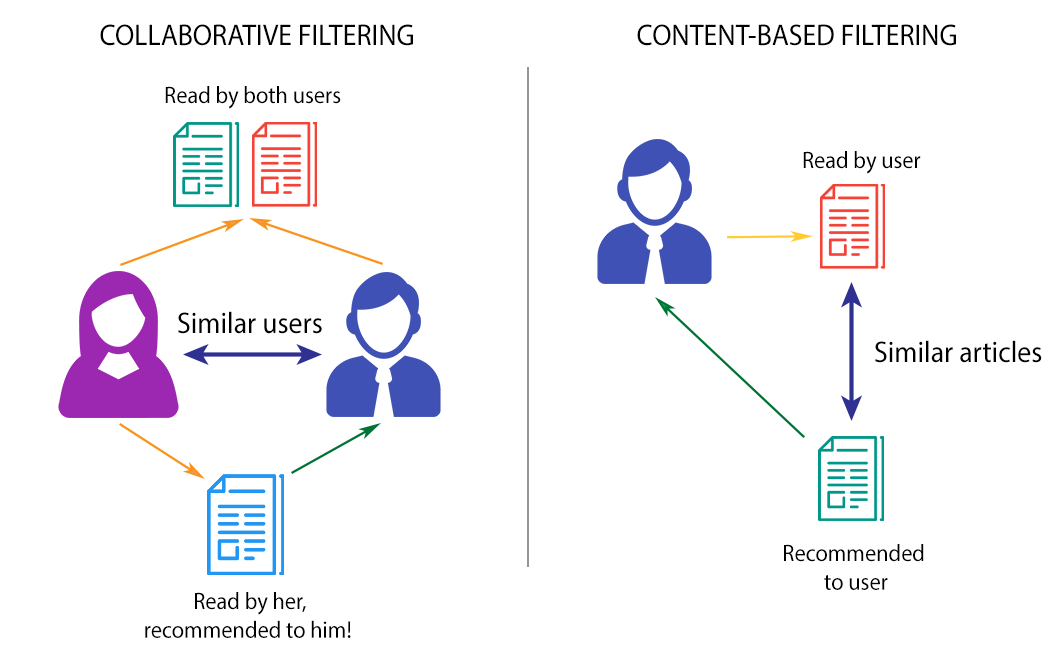

**Profile Building**

**Profile Building** involves creating a user profile based on the features of items that the user has interacted with. This user profile helps in predicting the user's preference for other items. Here is the mathematical approach to profile building:

1. **Item Features Matrix**:
  Suppose we have $ n $ items and each item is described by $ m $ features. Let $ F $ be the item-feature matrix where $ F_{ij} $ represents the value of feature $ j $ for item $ i $:$$
F = \begin{pmatrix}
f_{11} & f_{12} & \cdots & f_{1m} \\
f_{21} & f_{22} & \cdots & f_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
f_{n1} & f_{n2} & \cdots & f_{nm}
\end{pmatrix}$$

2. **User-Item Interaction Matrix**:
  Let $ R $ be the user-item interaction matrix where $ R_{ui} $ represents the rating given by user $ u $ to item  $i$:
  $$
  R = \begin{pmatrix}
  r_{11} & r_{12} & \cdots & r_{1n} \\
  r_{21} & r_{22} & \cdots & r_{2n} \\
  \vdots & \vdots & \ddots & \vdots \\
  r_{m1} & r_{m2} & \cdots & r_{mn}
  \end{pmatrix}
  $$

3. **User Profile Vector**:
  The user profile vector $ P_u $ for user $ u $ can be calculated as a weighted sum of item feature vectors, where the weights are the user's ratings for those items:
  $$
  P_u = \sum_{i=1}^{n} R_{ui} \cdot F_i
  $$
  Here, $ F_i $ is the feature vector for item $ i $.

  For example, if user $ u $ has rated three items (Item 1, Item 2, and Item 3) with ratings $ r_{u1}, r_{u2}, r_{u3} $, and these items have feature vectors $ F_1, F_2, F_3 $, then the user profile $ P_u $ is:
  $$
  P_u = r_{u1} \cdot F_1 + r_{u2} \cdot F_2 + r_{u3} \cdot F_3
  $$

**Similarity Measures**

**Similarity Measures** are techniques used to find how similar two items or users are. Here, we discuss two common similarity measures: cosine similarity and Euclidean distance.

1. **Cosine Similarity**:
  Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space. It is commonly used to measure the similarity between two item feature vectors or user profile vectors.

  Given two vectors $ A $ and $ B $, the cosine similarity is defined as:
  $$
  \text{cosine_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
  $$
  where $ A \cdot B $ is the dot product of vectors $ A $ and $ B $, and $ \|A\| $ and $ \|B\| $ are the magnitudes (Euclidean norms) of vectors $ A $ and $ B $.

  Example:
  $$
  A = [a_1, a_2, \ldots, a_m], \quad B = [b_1, b_2, \ldots, b_m]
  $$
  $$
  A \cdot B = \sum_{i=1}^{m} a_i b_i
  $$
  $$
  \|A\| = \sqrt{\sum_{i=1}^{m} a_i^2}, \quad \|B\| = \sqrt{\sum_{i=1}^{m} b_i^2}
  $$
  $$
  \text{cosine\_similarity}(A, B) = \frac{\sum_{i=1}^{m} a_i b_i}{\sqrt{\sum_{i=1}^{m} a_i^2} \sqrt{\sum_{i=1}^{m} b_i^2}}
  $$

2. **Euclidean Distance**:
  Euclidean distance measures the straight-line distance between two points in a multi-dimensional space. It is another way to measure the similarity (or dissimilarity) between two vectors.

  Given two vectors $ A $ and $ B $, the Euclidean distance is defined as:
  $$
  \text{euclidean\_distance}(A, B) = \sqrt{\sum_{i=1}^{m} (a_i - b_i)^2}
  $$

  Example:
  $$
  A = [a_1, a_2, \ldots, a_m], \quad B = [b_1, b_2, \ldots, b_m]
  $$
  $$
  \text{euclidean\_distance}(A, B) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \cdots + (a_m - b_m)^2}
  $$

**Example Calculation**

Let's use a simple example to demonstrate profile building and similarity measures.

**Item Features Matrix**:
$$
F = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$
Items have 3 features each.

**User-Item Interaction Matrix**:
$$
R = \begin{pmatrix}
5 & 3 & 0 & 1 \\
4 & 0 & 2 & 1 \\
1 & 1 & 0 & 5 \\
0 & 3 & 4 & 5
\end{pmatrix}
$$

**Profile Building** for User 1:

User 1 has rated items 1, 2, and 4. Their ratings are 5, 3, and 1 respectively.

Feature vectors for these items:
$$
F_1 = [1, 0, 1], \quad F_2 = [0, 1, 1], \quad F_4 = [0, 0, 1]
$$

User profile $ P_1 $:
$$
P_1 = 5 \cdot [1, 0, 1] + 3 \cdot [0, 1, 1] + 1 \cdot [0, 0, 1] = [5, 0, 5] + [0, 3, 3] + [0, 0, 1] = [5, 3, 9]
$$

**Cosine Similarity** between User 1's profile and Item 3's feature vector:

Item 3's feature vector:
$$
F_3 = [1, 1, 0]
$$

$$
\text{cosine\_similarity}(P_1, F_3) = \frac{P_1 \cdot F_3}{\|P_1\| \|F_3\|} = \frac{(5 \cdot 1 + 3 \cdot 1 + 9 \cdot 0)}{\sqrt{5^2 + 3^2 + 9^2} \sqrt{1^2 + 1^2}} = \frac{8}{\sqrt{115} \cdot \sqrt{2}} \approx 0.526
$$

**Euclidean Distance** between User 1's profile and Item 3's feature vector:
$$
\text{euclidean\_distance}(P_1, F_3) = \sqrt{(5 - 1)^2 + (3 - 1)^2 + (9 - 0)^2} = \sqrt{16 + 4 + 81} = \sqrt{101} \approx 10.05
$$

This demonstrates the mathematical foundation for profile building and similarity measures in recommendation systems.

# **Hybrid recommendation systems**

**4. Hybrid Recommendation Systems**

**Concept**: Combines collaborative and content-based filtering to leverage the strengths of both approaches.

**Techniques**:
- **Weighted Hybrid**: Combines the scores from **collaborative** and **content-based** methods with certain weights.
- **Switching Hybrid**: Switches between collaborative and content-based methods based on certain conditions.
- **Feature Augmentation**: Uses one method to enhance the input of another method.
- **Cascade Hybrid**: Uses one method to refine the results of another method.

**Pros and Cons**:
- **Pros**: Combines strengths of both methods, more robust and accurate recommendations.
- **Cons**: More complex to implement, may require more computational resources.

---


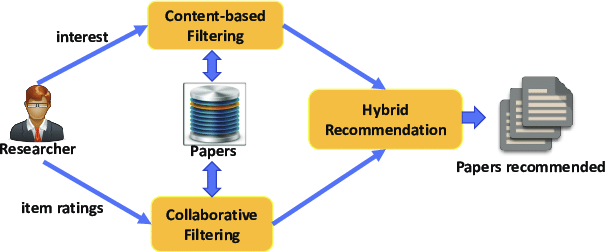

In [ ]:
# 1. Weighted Hybrid

import numpy as np

# Example scores from collaborative and content-based methods
collaborative_scores = np.array([4.5, 3.2, 2.8, 5.0, 4.1])
content_based_scores = np.array([3.8, 3.5, 2.9, 4.2, 3.7])

# Define weights
alpha = 0.6  # Weight for collaborative scores
beta = 0.4   # Weight for content-based scores

# Weighted Hybrid recommendation scores
weighted_hybrid_scores = alpha * collaborative_scores + beta * content_based_scores

# Example output
print("Weighted Hybrid Scores:")
for i, score in enumerate(weighted_hybrid_scores):
    print(f"Item {i+1}: {score:.2f}")

In [ ]:
# 2. Switching Hybrid

import random

# Example ratings availability
has_ratings = True  # Assume ratings are available for collaborative filtering

# Example scores from collaborative and content-based methods
collaborative_scores = np.array([4.5, 3.2, 2.8, 5.0, 4.1])
content_based_scores = np.array([3.8, 3.5, 2.9, 4.2, 3.7])

# Switching Hybrid recommendation scores
if has_ratings:
    switching_hybrid_scores = collaborative_scores
else:
    switching_hybrid_scores = content_based_scores

# Example output
method_used = "Collaborative Filtering" if has_ratings else "Content-Based Filtering"
print(f"Switching Hybrid Scores (Using {method_used}):")
for i, score in enumerate(switching_hybrid_scores):
    print(f"Item {i+1}: {score:.2f}")

In [ ]:
# 3. Feature Augmentation
import numpy as np

# Example original features and additional features
original_features = np.array([[1, 0, 1],
                              [0, 1, 1],
                              [1, 1, 0],
                              [0, 0, 1]])

additional_features = np.array([[0.2, 0.5],
                                [0.3, 0.4],
                                [0.1, 0.7],
                                [0.4, 0.2]])

# Feature Augmentation
augmented_features = np.hstack((original_features, additional_features))

# Example output
print("Augmented Features:")
for i, features in enumerate(augmented_features):
    print(f"Item {i+1}: {features}")

In [ ]:
# 4. Cascade Hybrid
import numpy as np

# Example scores from collaborative and content-based methods
collaborative_scores = np.array([4.5, 3.2, 2.8, 5.0, 4.1])
content_based_scores = np.array([3.8, 3.5, 2.9, 4.2, 3.7])

# Cascade Hybrid: Use content-based scores to refine collaborative scores
refined_scores = collaborative_scores * content_based_scores

# Example output
print("Refined Scores (Cascade Hybrid):")
for i, score in enumerate(refined_scores):
    print(f"Item {i+1}: {score:.2f}")

# **Evaluating recommendation systems**

**Evaluating Recommendation Systems**

**Metrics**:
- **Accuracy Metrics**: Precision, Recall, F1-Score, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE).
- **Ranking Metrics**: Mean Reciprocal Rank (MRR), Normalized Discounted Cumulative Gain (NDCG), Mean Average Precision at K (MAP@K).
- **Diversity Metrics**: Measures how diverse the recommendations are.
- **Novelty Metrics**: Measures how novel or unexpected the recommendations are.
- **User Satisfaction**: Surveys or feedback to measure user satisfaction with recommendations.

**Evaluation Methods**:
- **Offline Evaluation**: Using historical data to evaluate performance through metrics.
- **Online Evaluation**: A/B testing and multivariate testing to evaluate performance in a live environment.
- **User Studies**: Collecting qualitative feedback from users about their experience.

---


**Mean Reciprocal Rank (MRR)**

Mean Reciprocal Rank evaluates the effectiveness of a recommendation system based on the ranks of relevant items.

$$ \text{MRR} = \frac{1}{|U|} \sum_{u \in U} \frac{1}{\text{rank}_u} $$

Where:
- $ |U| $ is the number of users.
- $ \text{rank}_u $ is the rank of the first relevant item recommended to user $ u $.

**Normalized Discounted Cumulative Gain (NDCG)**

NDCG measures the ranking quality of the recommendation list by considering both relevance and position of recommended items.

$$ \text{DCG}@k = \sum_{i=1}^{k} \frac{2^{rel_i} - 1}{\log_2(i+1)} $$

$$ \text{NDCG}@k = \frac{\text{DCG}@k}{\text{IDCG}@k} $$

Where:
- $ rel_i $ is the relevance of the item at rank $ i $.
- $ \text{IDCG}@k $ is the Ideal DCG, which is the DCG score when the list is perfectly ordered by relevance.

**Mean Average Precision at K (MAP@K)**

Mean Average Precision at K calculates the average precision for each user across their top $ K $ recommendations.

$$ \text{AP}@K = \frac{1}{\min(K, \text{num_relevant_items})} \sum_{k=1}^{K} \left( \frac{\text{Precision}@k}{\text{relevant_at_k}} \right) $$

$$ \text{MAP}@K = \frac{1}{|U|} \sum_{u \in U} \text{AP}@K $$

Where:
- $ \text{Precision}@k $ is the precision at cut-off $ k $.
- $ \text{relevant_at_k} $ is an indicator function that is 1 if the item at rank $ k $ is relevant, 0 otherwise.
- $ |U| $ is the number of users.

**Diversity Metrics**

Diversity metrics measure how diverse the recommendations are, aiming to ensure variety in recommended items.

**Novelty Metrics**

Novelty metrics measure how novel or unexpected the recommendations are, aiming to introduce users to new items or perspectives.

**User Satisfaction**

User satisfaction metrics often involve surveys or feedback mechanisms to gather user opinions and satisfaction levels with the recommendations.

---

**1. Precision**

$$
Precision = \frac{|\text{relevant documents}| \cap |\text{retrieved documents}|}{|\text{retrieved documents}|}
$$

precision is defined as the ratio of the retrieved documents taht are relevant to user's query over the retrieved documents.

When $k$ retrieved documents are considered, precision becomes: $P@k$.


**2. Recall**

$$
Precision = \frac{|\text{relevant documents}| \cap |\text{retrieved documents}|}{|\text{relevant documents}|}
$$

recall is the ratio retrieved documents that are relevant to user's query over the relevant documents.

NB: Recall in this cas is not useful by running returning all the documents for a query will result in a retrieval of $100%$ recall, hence recall by itself is commonly not used as a metric.


**3. Average Precision**
$$
AP@n = \frac{1}{\text{GTP}} \sum_{k=1}^{n} P@k * rel@k
$$

GTP = Ground Truth positive or number of relevant documents in the retrieved documents.

$n$ : number of retrieved documents<br>
$P@k$ : precison@k<br>
$rel@k = 1$ if document at rank $k$ is relevant $0$ otherwise.

**4. mAP**

For each query, Q, we can calculate a corresponding AP. A user can have as much queries as he/she likes against this labeled database. The mAP is simply the mean of all queries that the use made.
$$
mAP = \frac{1}{N} \sum_{i=1}^N APi
$$

$AP_i$ can be $AP@1$ or $AP@2$, etc.